In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [159]:
test_data = pd.read_csv('../../req_data/credit_card_default_test.csv')
train_data = pd.read_csv('../../req_data/credit_card_default_train.csv')

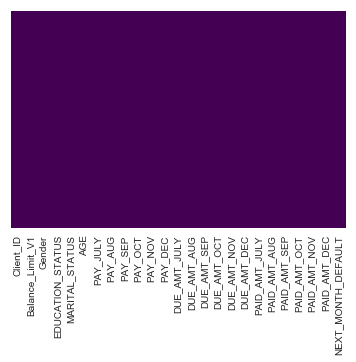

In [160]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [161]:
train_data.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,...,0,0,0,0,0,0,0,0,0,1
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,...,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,...,435354,445271,453899,0,20790,16170,17325,16401,17325,0


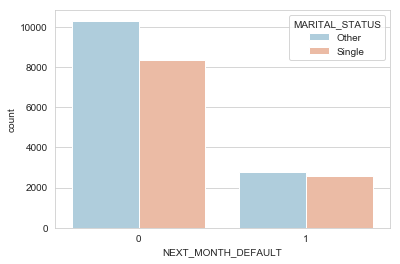

In [162]:
sns.set_style('whitegrid')
sns.countplot(x='NEXT_MONTH_DEFAULT',hue='MARITAL_STATUS',data=train_data,palette='RdBu_r')

In [163]:
train_data[['EDUCATION_STATUS', 'NEXT_MONTH_DEFAULT']].groupby(['EDUCATION_STATUS'], as_index=False).mean().sort_values(by='NEXT_MONTH_DEFAULT', ascending=False)


,EDUCATION_STATUS,NEXT_MONTH_DEFAULT
1,High School,0.251210
2,Other,0.232301
0,Graduate,0.194621


In [164]:
def my_fun(x):
    if (x[-1] =='K'):
        x=x[:-1]
    else:
        x= float(x[:-1])*1000
    return x  

In [165]:
train_data['Balance_Limit_V1']= train_data['Balance_Limit_V1'].apply(lambda x: my_fun(x))
test_data['Balance_Limit_V1']=test_data['Balance_Limit_V1'].apply(lambda x: my_fun(x))


In [166]:
test_data.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
0,A20170,500,M,Other,Single,31-45,0,0,0,0,...,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
1,A16887,200,F,Other,Single,31-45,0,0,0,0,...,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
2,A3430,400,M,Other,Other,Less than 30,-1,-1,2,0,...,8984,11294,9561,993,6930,0,2310,0,2310,40060
3,A3696,1500,M,Graduate,Single,31-45,1,-1,-1,-2,...,5775,0,0,0,5775,5775,0,0,0,0
4,A20474,100,F,High School,Other,Less than 30,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [167]:
encoder= LabelEncoder()
train_data['Gender']=encoder.fit_transform(train_data['Gender'])
train_data['EDUCATION_STATUS']=encoder.fit_transform(train_data['EDUCATION_STATUS'])
train_data['MARITAL_STATUS']=encoder.fit_transform(train_data['MARITAL_STATUS'])
train_data['AGE']=encoder.fit_transform(train_data['AGE'])


In [168]:
test_data['Gender']=encoder.fit_transform(test_data['Gender'])
test_data['EDUCATION_STATUS']=encoder.fit_transform(test_data['EDUCATION_STATUS'])
test_data['MARITAL_STATUS']=encoder.fit_transform(test_data['MARITAL_STATUS'])
test_data['AGE']=encoder.fit_transform(test_data['AGE'])

In [169]:
test_data.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
0,A20170,500,1,2,1,0,0,0,0,0,...,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
1,A16887,200,0,2,1,0,0,0,0,0,...,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
2,A3430,400,1,2,0,2,-1,-1,2,0,...,8984,11294,9561,993,6930,0,2310,0,2310,40060
3,A3696,1500,1,0,1,0,1,-1,-1,-2,...,5775,0,0,0,5775,5775,0,0,0,0
4,A20474,100,0,1,0,2,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0


Splitting Data

In [170]:
X_train = train_data.drop(['Client_ID','NEXT_MONTH_DEFAULT'], axis=1)
y_train = train_data['NEXT_MONTH_DEFAULT']
X_test = test_data.drop(['Client_ID'], axis=1)


Using Decision Tree Algorithm

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
dtree = DecisionTreeClassifier()

In [173]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [174]:
dec_pred = dtree.predict(X_test)

In [175]:
decisiont_output = pd.DataFrame(test_data['Client_ID']) 
decisiont_output['NEXT_MONTH_DEFAULT']= dec_pred
decisiont_output.to_csv('decision_tree.csv', encoding='utf-8', index=False)

Using Random Forest 

In [176]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [179]:
rfc_pred = rfc.predict(X_test)

In [178]:
randomf_output = pd.DataFrame(test_data['Client_ID']) 
randomf_output['NEXT_MONTH_DEFAULT']= rfc_pred
randomf_output.to_csv('random_forest.csv', encoding='utf-8', index=False)